In [4]:
import pandas as pd, tensorflow as tf,  matplotlib.pyplot as plt, sys
from sklearn.preprocessing import MinMaxScaler

from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FuncFormatter
from plot_styles import set_plotstyles
set_plotstyles()
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [69]:
import pandas as pd
freqs = np.linspace(0.1, 0.2, 1024)
get_slope = lambda x: np.mean((np.diff(np.unwrap(x))  / (2 * np.pi)) / np.diff(freqs))


num_entries = 10000

rand_wangle_data = np.empty((num_entries, len(freqs)))
slope_rwd = np.empty(num_entries)

for i in range(num_entries):
    
    tau = np.random.uniform(low = -100,
                            high = 100) 
    
    phi = np.random.uniform(high = 2 * np.pi)
    
    rand_wangle_data[i] = np.angle(np.exp(2 * np.pi * 1j * (tau*freqs + phi)))
    slope_rwd[i] = get_slope(np.unwrap(rand_wangle_data[i]))
    noise = np.random.normal(scale = np.random.uniform(low = 0, high = 1), size = len(freqs))
    
    for j in range(len(freqs)):
        if np.random.uniform() < 0.01:
            rand_wangle_data[i][j] *= 3
    rand_wangle_data[i] += noise

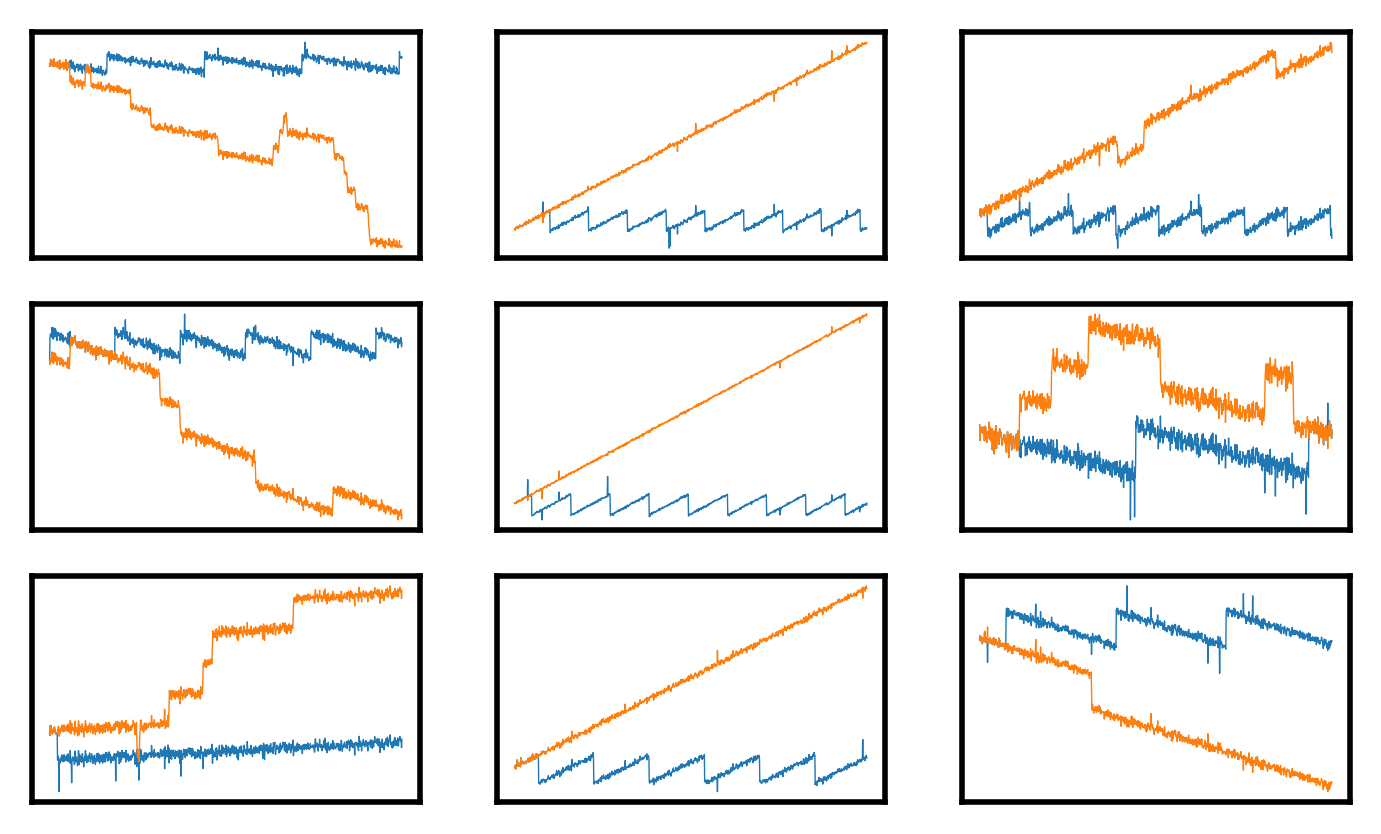

In [70]:
fig, axes = plt.subplots(3,3, figsize = (8.5, 5), dpi = 100)
nine_random_entries = np.random.choice(range(num_entries), size = 9)
for i, ax in enumerate(axes.reshape(-1)):
    
    ax.plot(freqs, rand_wangle_data[nine_random_entries[i]],
#             linestyle = 'none', marker = '.', markersize = 1, alpha = 0.75,
            linewidth = 0.5)
    
    ax.plot(freqs, np.unwrap(rand_wangle_data[nine_random_entries[i]]),
#             linestyle = 'none', marker = '.', markersize = 1, alpha = 0.75,
            linewidth = 0.5)

    
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

In [71]:
df = pd.DataFrame(rand_wangle_data)
df.insert(0, 'slope', slope_rwd)
df.to_csv('data/wu_spikey.csv', index = False)